In [ ]:
import numpy as np
import pandas as pd

#Q2

In [ ]:
from keras.datasets import fashion_mnist
(x_data, y_data), (test_x, test_y) = fashion_mnist.load_data()
정답 = ['티셔츠', '바지', '스웨터', '원피스', '코트', '샌들', '셔츠',' 신발', '가방', '구두']

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_data.shape, y_data.shape, test_x.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size = 0.2)#, stratify = y)

In [ ]:
train_x.shape, test_x.shape, val_y.shape, train_y.shape, test_y.shape, val_y.shape

((48000, 28, 28), (10000, 28, 28), (12000,), (48000,), (10000,), (12000,))

In [ ]:
import numpy as np
np.unique(train_y, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4793, 4813, 4831, 4774, 4838, 4814, 4823, 4735, 4789, 4790]))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.losses import categorical_crossentropy, sparse_categorical_crossentropy

In [ ]:
m = Sequential()
m.add(Flatten(input_shape = train_x.shape[1:])) # 데이터의 갯수
m.add(Dense(100, activation = 'relu'))
m.add(Dense(10, activation = 'softmax'))
m.summary()
# 여기까지는 내용만 담겨있음

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m.compile(loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
hy = m.fit(train_x, train_y, validation_data = (val_x, val_y), epochs = 50)

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 4.1547 - acc: 0.6845 - val_loss: 0.9717 - val_acc: 0.7623
Epoch 2/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7801 - acc: 0.7545 - val_loss: 0.7027 - val_acc: 0.7847
Epoch 3/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.7158 - acc: 0.7787 - val_loss: 0.7795 - val_acc: 0.7897
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7044 - acc: 0.7922 - val_loss: 0.8609 - val_acc: 0.7580
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6964 - acc: 0.7995 - val_loss: 0.7557 - val_acc: 0.8004
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6860 - acc: 0.8057 - val_loss: 0.7109 - val_acc: 0.8169
Epoch 7/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.6836 - acc: 0.8086 - val_loss: 0.7721 - val_acc: 0.8207
Epoch 8/50
1500/1500 [==============================] - 4s 3ms

In [ ]:
import numpy as np
m.predict(test_x)
test_y

313/313 [==============================] - 1s 1ms/step


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
np.argmax([[0,0,0,0,0,1,0,0,0,0], [0,0,2,0,0,0,0,0,0,0]], axis = 1)

array([5, 2])

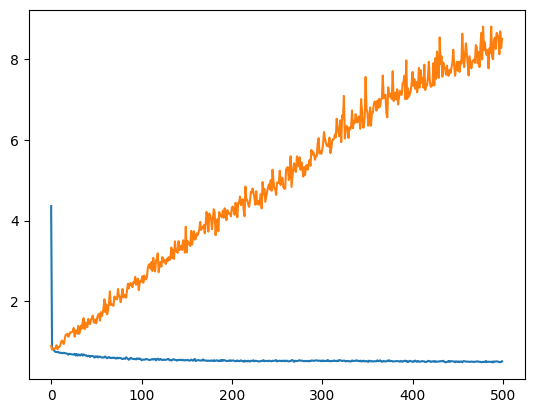

In [19]:
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()